In [1]:
import sys 

In [2]:
cd '/srv/flash1/hagrawal9/project/habitat/habitat-api/'

/coc/testnvme/hagrawal9/project/habitat/habitat-api


In [3]:
import gzip
import json
import os
import sys
from typing import Any, Dict, List, Optional, Type

import attr
import cv2
import git
import magnum as mn
import numpy as np

# %matplotlib inline
from matplotlib import pyplot as plt
from pathlib import Path
from PIL import Image


import habitat
import habitat_sim
from habitat.config import Config
from habitat.core.registry import registry
from habitat_sim.utils import viz_utils as vut
from habitat.utils.visualizations import maps, fog_of_war
from habitat.utils.visualizations.utils import observations_to_image

from rearrangement.utils.planner import (
    compute_traversable_map,
    compute_distance_using_fmm,
    find_shortest_path_for_multiple_objects,
    compute_distance_mat_using_fmm,
    compute_distance_mat_using_navmesh
)
from rearrangement.utils.visualization import (
    get_top_down_map
)
from rearrangement.utils.geometry import (
     geodesic_distance, get_polar_angle
)

In [4]:

from habitat.datasets.rearrangement.rearrangement_dataset import RearrangementDatasetV0
from habitat.tasks.rearrangement.rearrangement_task import RearrangementEpisode

In [5]:
repo = git.Repo(".", search_parent_directories=True)
dir_path = repo.working_tree_dir
# %cd $dir_path
data_path = os.path.join(dir_path, "data")
output_directory = "data/tutorials/output/"  # @param {type:"string"}
output_path = os.path.join(dir_path, output_directory)

In [17]:
config = habitat.get_config("configs/tasks/rearrangement_gibson_map.yaml")

In [18]:
config.defrost()
config.DATASET.SPLIT = "val"
config.TASK.MEASUREMENTS = ['OBJECT_TO_GOAL_DISTANCE', 'AGENT_TO_OBJECT_DISTANCE', 'TOP_DOWN_MAP']
config.freeze()

In [19]:
try:
    env.close()
except:
    pass
env = habitat.Env(config)
fog_of_war_mask = None

2020-11-13 22:18:02,864 Initializing dataset RearrangementDataset-v0
2020-11-13 22:18:03,060 initializing sim RearrangementSim-v0
I1113 22:18:06.606629 13994 simulator.py:168] Loaded navmesh data/scene_datasets/gibson_train_val/Willow.navmesh
I1113 22:18:06.609532 13994 simulator.py:180] Recomputing navmesh for agent's height 0.88 and radius 0.18.
2020-11-13 22:18:06,897 Initializing task RearrangementTask-v0


In [20]:
obs = env.reset()
metrics = env.get_metrics()

In [10]:
# obs = env.step(1)
obs = env.step(0)

In [11]:
# obs = env.step(1)
obs = env.step(1)

In [12]:
obs = env.step(2)

In [13]:
obs = env.step(3)

In [16]:
obs.keys()

dict_keys(['rgb', 'depth', 'rgb_3rd_person', 'gripped_object_id', 'all_object_positions', 'all_object_goals', 'oracle_next_object', 'random_object', 'closest_object', 'l2dist_object'])

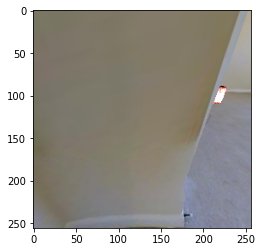

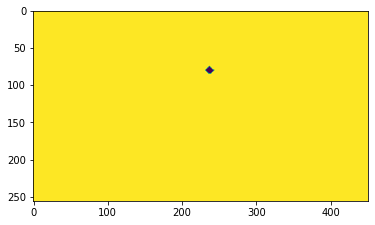

KeyError: 'top_down_map'

In [21]:
plt.imshow(obs['rgb'])
plt.show()
# plt.title(f"{env._task.misc_dict['pickup_order_map_object']}, {env._task.misc_dict['pickup_order_oracle_next_object']}, {env._task.misc_dict['pickup_order_closest_object']}, {env._task.misc_dict['pickup_order_l2dist_object']}")
plt.imshow(env._task.misc_dict['obstacles_mask'])
plt.show()
plt.imshow(env._task.misc_dict['top_down_map'])


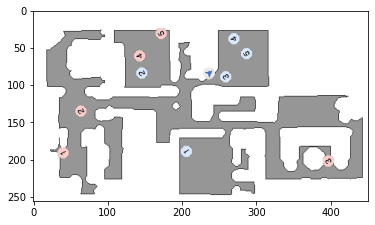

In [29]:
metrics = env.get_metrics()

top_down_map, fog_of_war_mask = get_top_down_map(
    env, env._task._simple_pathfinder, ignore_objects=True, fog_of_war_mask=fog_of_war_mask, draw_fow=True, 
    draw_agent=True, draw_object_start_pos=True, draw_object_final_pos=True, draw_object_curr_pos=True
)


plt.imshow(top_down_map)
plt.show()